<a href="https://colab.research.google.com/github/daffaalfajrii1/CapstoneProject-MencaK/blob/main/Capstone_Fixed_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Menghubungkan colab dengan Drive untuk mengakses dataset

from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Mengecek apakah GPU tersedia

import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")


Default GPU Device:/device:GPU:0


In [3]:
# Import Semua Library yang diperlukan 

import matplotlib.pyplot as plt
import os
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

In [4]:
# Mengekstrak file zip yang memuat dataset

import zipfile 
!unzip '/content/drive/MyDrive/newdata.zip'

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (345).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (347).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (348).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (349).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (35).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (351).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (353).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (355).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (356).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (357).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (358).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (359).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (36).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (360).jpg  
  inflating: newdata/train/Ayam Betutu/Ayam Betutu (362).jpg 

In [9]:
# pemberian nama variabel untuk setiap folder data
 
base_dir = '/content/newdata/' #Direktori dasar

In [10]:
train_dir =  os.path.join(base_dir, 'train')    #Direktori Train
validation_dir = os.path.join(base_dir, 'val')  #Direktori Vaildation
test_dir =  os.path.join(base_dir, 'test')      #Direktori untuk testing

In [11]:
# Memberikan nilai awal untuk batch size, ukuran gambar dan jumlah epochs

BATCH_SIZE = 64  #Variabel Batch Size sebesar 64 artinya proses akan dilakukan per 64 gambar untuk satu putaran
IMG_HEIGHT = 299 # Ukuran Tinggi Gambar
IMG_WIDHT = 299  # Ukuran Lebar Gambar
epochs = 10      # Model akan di train sebanyak 10 epoch

In [12]:
# Membuat Flow Data Gambar

train_dataset = image_dataset_from_directory(train_dir,                 # Memanggil Direktori Train
                                             shuffle=True,              # Aktifasi Pengacakan
                                             batch_size=BATCH_SIZE,     # 64 Batch Size
                                             label_mode="categorical",  # Mode Categorical digunakan karena data kami merupakan data multiclass
                                             color_mode='rgb',          # Mode warna RGB
                                             image_size=(IMG_HEIGHT, IMG_WIDHT)) # Pengaturan image size

validation_dataset = image_dataset_from_directory(validation_dir,       # Memanggil Direktori Val
                                             shuffle=True,              # Aktifasi Pengacakan
                                             batch_size=BATCH_SIZE,     # 64 Batch Size
                                             label_mode="categorical",  # Mode Categorical digunakan karena data kami merupakan data multiclass
                                             color_mode='rgb',          # Mode warna RGB
                                             image_size=(IMG_HEIGHT, IMG_WIDHT)) # Pengaturan image size

test_dataset = image_dataset_from_directory(test_dir,                   # Memanggil Direktori test
                                             shuffle=True,              # Aktifasi Pengacakan
                                             batch_size=BATCH_SIZE,     # 64 Batch Size
                                             label_mode="categorical",  # Label Mode menggunakan categorical karena multiclass
                                             color_mode='rgb',          # Mode warna RGB
                                             image_size=(IMG_HEIGHT, IMG_WIDHT))# Pengaturan image size

Found 4021 files belonging to 15 classes.
Found 1153 files belonging to 15 classes.
Found 582 files belonging to 15 classes.


In [13]:
 # Menampilkan nama dari 15 kelas
 
class_names = train_dataset.class_names
print(class_names)

['Ayam Betutu', 'Gado-gado Betawi', 'Kue Cucur', 'Kue Serabi', 'Lumpia', 'Pecel Lele', 'Rawon', 'Roti Ganjel Rel', 'Sambal Matah', 'Sate Lilit', 'Sate Madura', 'Seblak', 'Semur Jengkol', 'Tahu Petis', 'Wingko Babat']


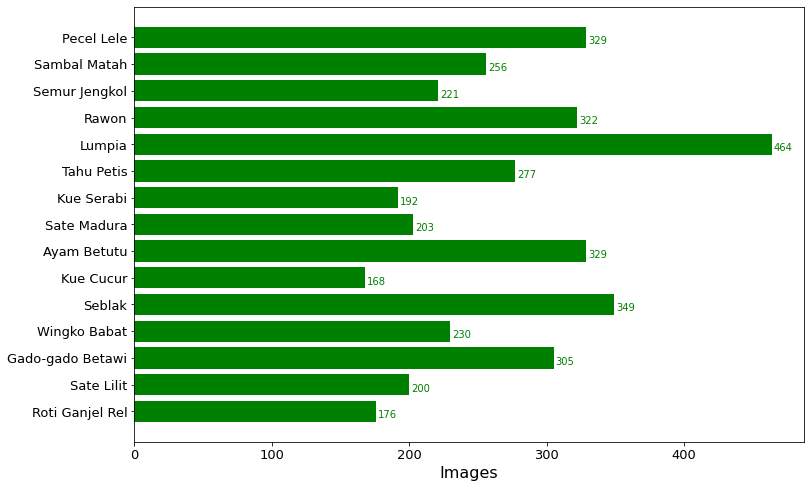

In [14]:
# Melihat distribusi data dan plotting gambar dari folder train

main= train_dir

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
    
  
keys = data.keys()
values = data.values()

colors=["red" if x<= 150 else "green" for x in values] # Bagannya akan berubah menjadi merah jika jumlah data kurang dari 150
fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

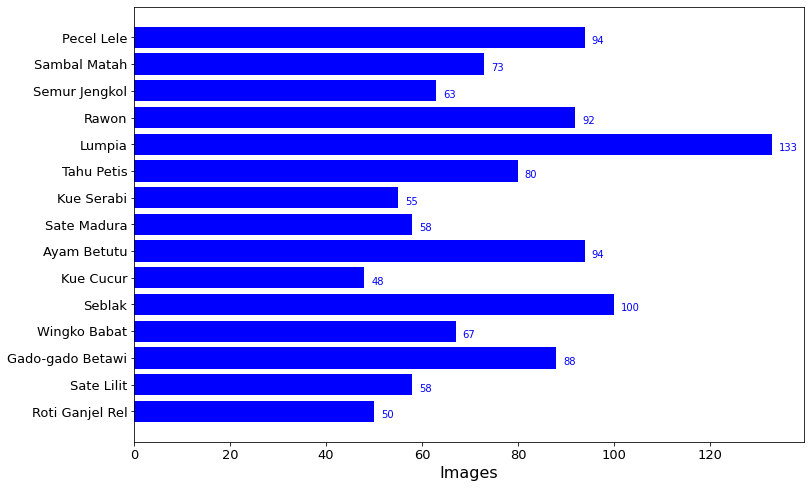

In [15]:
# Melihat distribusi data dari folder validation

main = validation_dir

data=dict()

for i in os.listdir(main):
    sub_dir=os.path.join(main,i)
    count=len(os.listdir(sub_dir))
    data[i]=count
    
  
keys = data.keys()
values = data.values()

colors=["blue" if x<= 150 else "green" for x in values] # Bagannya akan berubah menjadi hijau jika jumlah data lebih dari 150

fig, ax = plt.subplots(figsize=(12,8))
y_pos=np.arange(len(values))
plt.barh(y_pos,values,align='center',color=colors)
for i, v in enumerate(values):
    ax.text(v+1.4, i-0.25, str(v), color=colors[i])
ax.set_yticks(y_pos)
ax.set_yticklabels(keys)
ax.set_xlabel('Images',fontsize=16)
plt.xticks(color='black',fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [16]:
# Memodifikasi gambar dengan menggunakan Augmentasi
# Melakukan Random flip horizontal, random rotatiom dan random zoom

data_augmentation = Sequential(
    [
     RandomFlip(input_shape=(IMG_HEIGHT, IMG_WIDHT, 3), mode="horizontal"),
     RandomRotation(0.1), 
     RandomZoom(0.1) 
    ]
    , name="Argumentation" # Pemberian nama variabel
)

In [17]:
# Melihat Summary setelah dilakukan Augmentasi

data_augmentation.summary() 

Model: "Argumentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 299, 299, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 299, 299, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 299, 299, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Menggunakan AUTOTUNE keras

AUTOTUNE = tf.data.experimental.AUTOTUNE 
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Buffersize per 1000 gambar acak dituning untuk train data
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Buffersize per 1000 gambar acak dituning untuk validation data
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE) # Buffersize per 1000 gambar acak dituning untuk test data

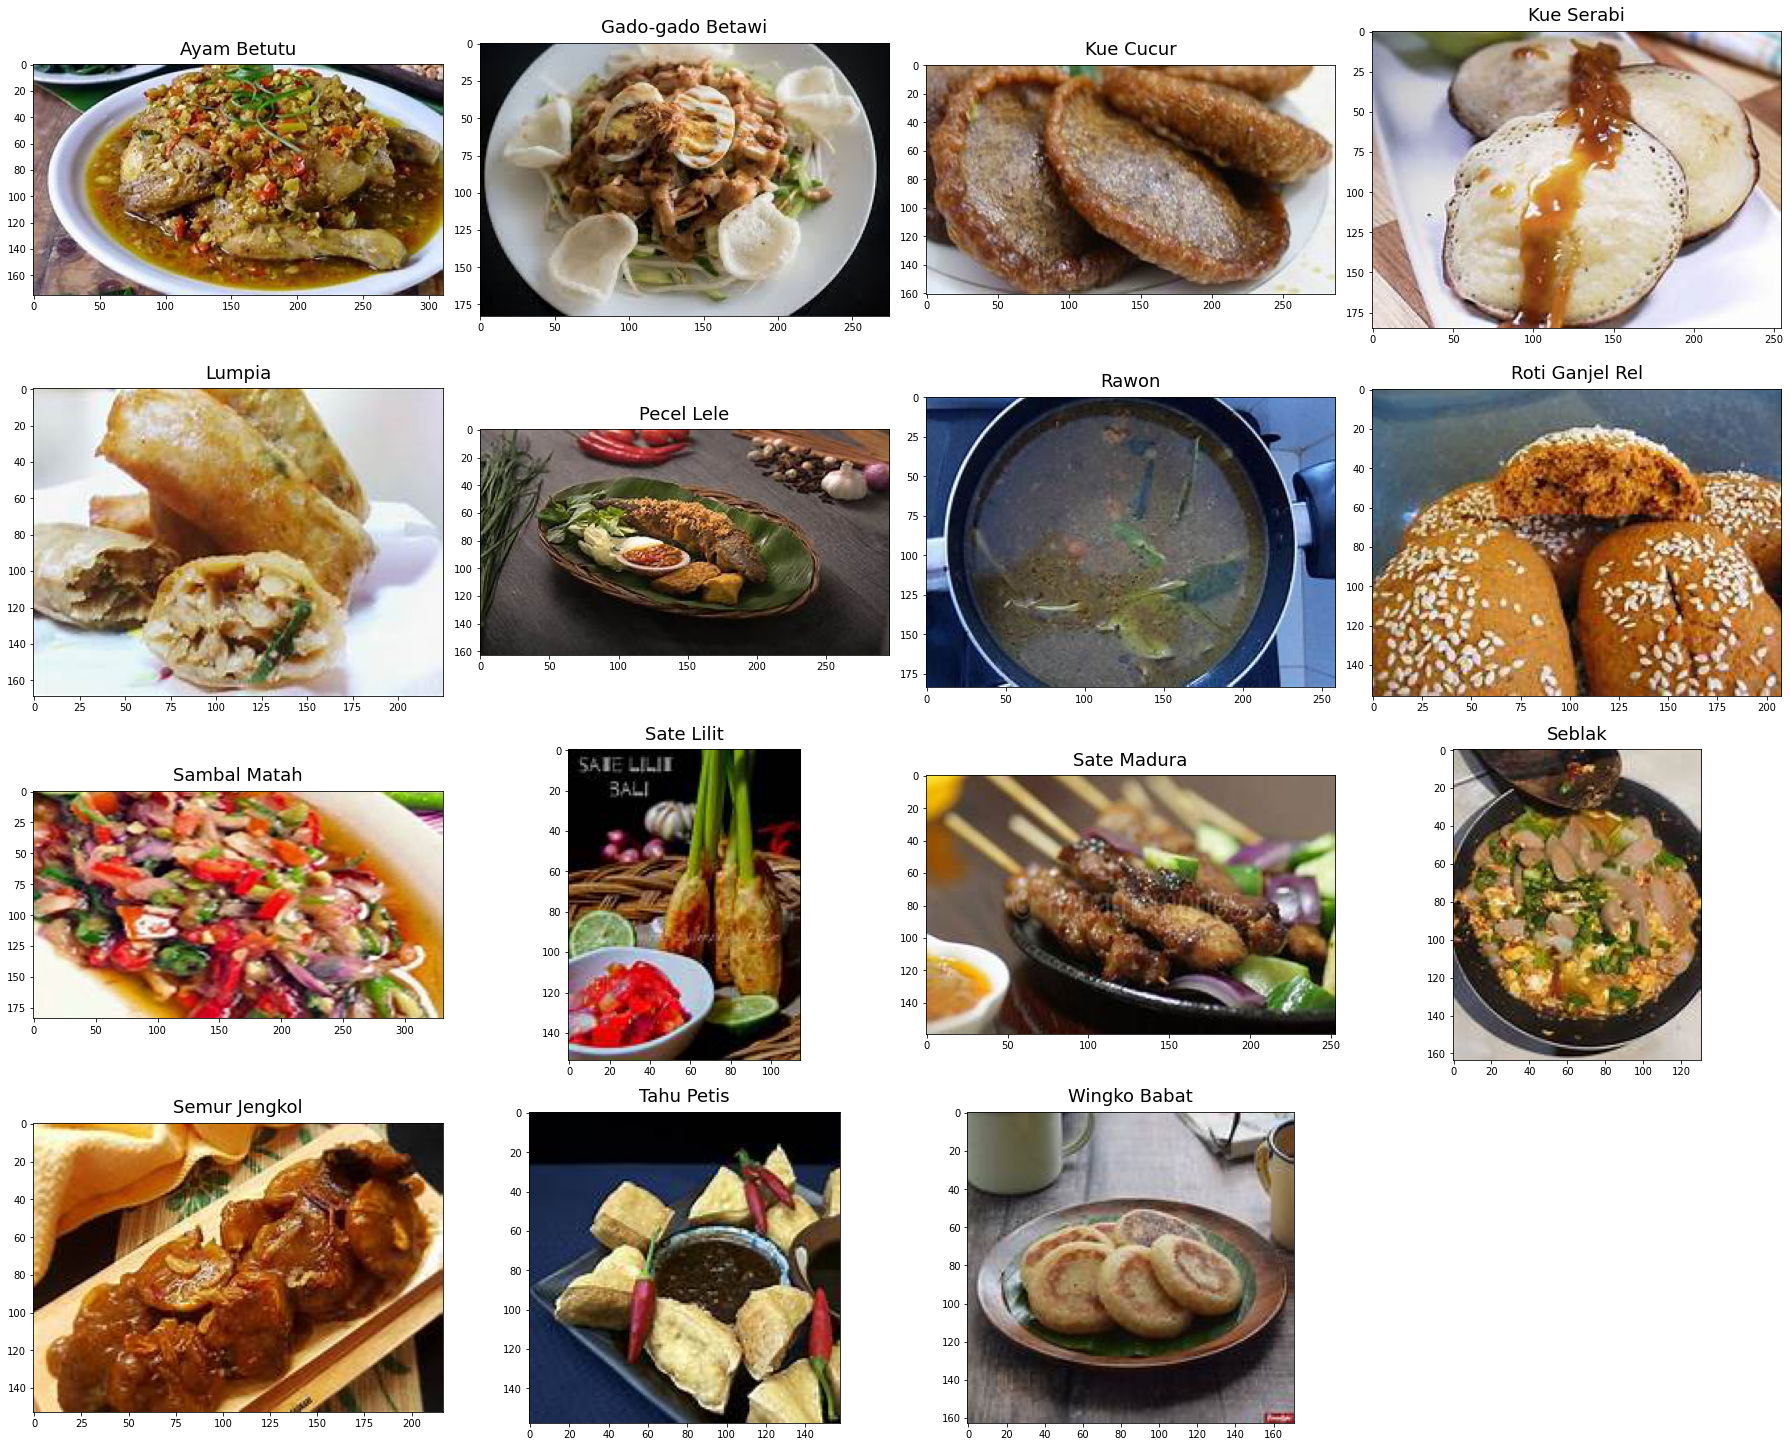

In [19]:
#Melihat distribusi gambar dan labeling

import random
train_folder = train_dir #Membuat variabel baru dengan nama train_folder
images = []

for food_folder in sorted(os.listdir(train_folder)): # Perulangan untuk disetiap food folder yang didefinisikan sebagai train folder
    food_items = os.listdir(train_folder + '/' + food_folder) # Masukkan food items
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

# Melakukan Plotting dan visualisasi gambar     

fig=plt.figure(1, figsize=(25, 25)) 

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)
    
plt.tight_layout()

In [20]:
# Menambahkan beberapa library yang diperlukan

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout 
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint 
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.losses import BinaryCrossentropy 
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import math

In [21]:
# Menggunakan learning rate unntuk menghitung nilai koreksi bobot pada saat train

learning_rate_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, 
                                                                         decay_steps=2, 
                                                                         decay_rate=1e-6, 
                                                                         staircase=False)

In [22]:
# Membuat Model dengan menggunakan transfer learning DenseNet201

from tensorflow.keras.layers import (
    BatchNormalization, Activation, Dropout, Dense, Conv2D
)

base_densenet_model = Sequential([
                       Rescaling(input_shape=(IMG_HEIGHT, IMG_WIDHT, 3), scale=1.0/255, name="Rescaling"), # Preprocessing dengan cara mormalisasi gambar dengan membagi 255
                       data_augmentation, # Menambahkan Augmentasi yang telah dibuat tadi
                       DenseNet201(input_shape=(IMG_WIDHT, IMG_HEIGHT, 3), weights="imagenet", include_top=False) # Masukkan transfer learning dan masukkan inputshape sesuai dengan ukuran gambar serta bobot ImageNet
], name="base_densenet_model") # Pemberian nama pada model

base_densenet_model.trainable = False
base_densenet_model.summary() # Melihat Summary model

custom_densenet_model = Sequential([ # Gunakan model sequential yang telah diimport di tensorflow
        base_densenet_model,         # Masukkan model dasar tadi
        BatchNormalization(), 
        GlobalAveragePooling2D(), 
        Dense(128, activation = 'relu'),   # Fully connected layer Dense 128 filter layout dengan aktivasi relu
        Dropout(0.2),                      # Gunakan dropout sebanyak 0.2 untuk mitigasi overfitting
        Dense(15, activation="softmax")    # Masukkan sesuai class yang digunakan disini kami memiliki 15 class 
        ], name = "custom.densenet_model") # Pemberian nama nama model

74850304/74836368 [==============================] - 0s 0us/step
Model: "base_densenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Rescaling (Rescaling)       (None, 299, 299, 3)       0         
                                                                 
 Argumentation (Sequential)  (None, 299, 299, 3)       0         
                                                                 
 densenet201 (Functional)    (None, 9, 9, 1920)        18321984  
                                                                 
Total params: 18,321,984
Trainable params: 0
Non-trainable params: 18,321,984
_________________________________________________________________


In [23]:
# Melihat Summary model

custom_densenet_model.summary()


Model: "custom.densenet_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_densenet_model (Sequen  (None, 9, 9, 1920)       18321984  
 tial)                                                           
                                                                 
 batch_normalization (BatchN  (None, 9, 9, 1920)       7680      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1920)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               245888    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                             

In [24]:
# Melakukan Compiling model menggunakan optimizer, Loss dan metrics yang sesuai

adam = tf.keras.optimizers.Adam(learning_rate = 0.001)
custom_densenet_model.compile(optimizer='adam', 
                              loss= 'categorical_crossentropy', 
                              metrics=['accuracy']  
                              )

In [ ]:
# Melakukan training model

history = custom_densenet_model.fit(     # Training data
    train_dataset,                       # Masukkan data yang akan di train yaitu train dataset
    validation_data=validation_dataset,  # Masukkan data yang akan di validasi yaitu validation dataset
    epochs= epochs,                      # Masukkan epoch sebanyak 10 kali
    verbose=1                            # Verbose
)

Epoch 1/10
63/63 [==============================] - 84s 808ms/step - loss: 1.4825 - accuracy: 0.5606 - val_loss: 0.9180 - val_accuracy: 0.7268
Epoch 2/10
63/63 [==============================] - 38s 610ms/step - loss: 0.6789 - accuracy: 0.7918 - val_loss: 0.6541 - val_accuracy: 0.8101
Epoch 3/10
63/63 [==============================] - 39s 627ms/step - loss: 0.5245 - accuracy: 0.8366 - val_loss: 0.6023 - val_accuracy: 0.8144
Epoch 4/10
63/63 [==============================] - 40s 639ms/step - loss: 0.4215 - accuracy: 0.8717 - val_loss: 0.5655 - val_accuracy: 0.8317
Epoch 5/10
43/63 [===================>..........] - ETA: 10s - loss: 0.3540 - accuracy: 0.8968

In [ ]:
# Menyimpan Model yang telah di train dengan format .h5

custom_densenet_model.save('CapsFixed_Model.h5')

In [ ]:
# Memanggil model yang telah tersimpan

loaded_model = tf.keras.models.load_model('/content/CapsFixed_Model.h5')

In [ ]:
# Melakukan Fine Tuning untuk meningkatkan akurasi

fine_tune_at = 150
for layer in loaded_model.layers[:fine_tune_at]:
    layer.trainable = False

loaded_model.compile(
    optimizer=Adam(learning_rate= 0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history_tune = loaded_model.fit(
    train_dataset,                      # Masukkan data yang akan di train yaitu train dataset
    validation_data=validation_dataset, # Masukkan data yang akan di validasi yaitu validation dataset
    epochs=3,                           # Masukkan epoch sebanyak 3 untuk training
    
)

Epoch 1/3
63/63 [==============================] - 58s 768ms/step - loss: 0.1737 - accuracy: 0.9513 - val_loss: 0.4688 - val_accuracy: 0.8518
Epoch 2/3
63/63 [==============================] - 46s 727ms/step - loss: 0.1727 - accuracy: 0.9518 - val_loss: 0.4688 - val_accuracy: 0.8518
Epoch 3/3
63/63 [==============================] - 44s 707ms/step - loss: 0.1746 - accuracy: 0.9527 - val_loss: 0.4688 - val_accuracy: 0.8518


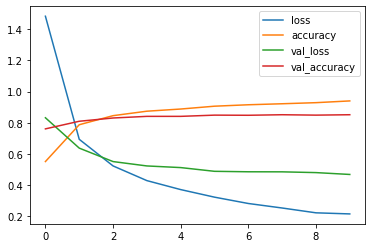

In [ ]:
pd.DataFrame(custom_densenet_model.history.history).plot()   # Plotting akurasi,loss,val loss, vall_ accuracy

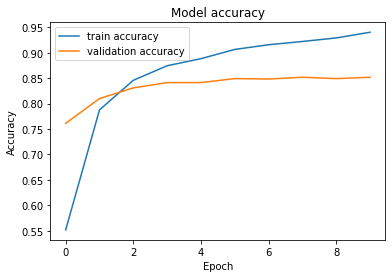

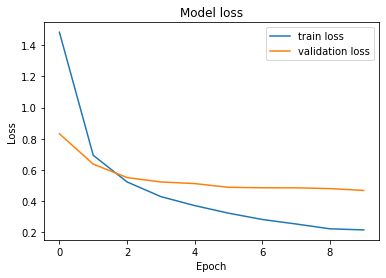

In [ ]:
def plot_accuracy(history ):
    
    plt.plot(history .history['accuracy'],label='train accuracy')
    plt.plot(history .history['val_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Accuracy_v1_Model Dense')
    plt.show()
    
def plot_loss(history ):
    
    plt.plot(history .history['loss'],label="train loss")
    plt.plot(history .history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.savefig('Loss_v1_Model Dense')
    plt.show()
    
plot_accuracy(history )
plot_loss(history )

In [ ]:
model = tf.keras.models.load_model('/content/CapsFixed_Model.h5')

In [ ]:
# Melakukan evaluasi model yang telah di train terhadap data pengujian

test_accuracy = loaded_model.evaluate(test_dataset)
print("The test akurasi  : ", test_accuracy[1]*100, "%")

10/10 [==============================] - 11s 908ms/step - loss: 0.4749 - accuracy: 0.8486
The test akurasi  :  84.863942861557 %


In [ ]:
# Melihat jumlah Akurasi dan loss pada data validasi

loss, accuracy = loaded_model.evaluate(validation_dataset)
print('Test accuracy :', accuracy)
print('Test loss:', loss)

18/18 [==============================] - 10s 552ms/step - loss: 0.4688 - accuracy: 0.8518
Test accuracy : 0.851787269115448
Test loss: 0.46883198618888855


Habis Ini RAM gw langsung abis jadi gabisa nge run yang bawahnya lagi. Belum coba predict juga !!!


In [ ]:
# Menyimpan Model ke daalam format tflite

converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()
open("ModelDeploy1.tflite", "wb").write(tflite_model)

NameError: ignored

In [ ]:
# Membuat Fungsi Predict untuk memprediksi gambar

from google.colab import files
files.download('/content/ModelDeploy.tflite') 

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image 
from skimage.io import imread
import cv2



model = loaded_model
category={
    0: ['ayam_betutu','Ayam Betutu'], 1: ['gado_gado_betawi','Gado-gado Betawi'], 2: ['kue_cucur','Kue Cucur'],
    3: ['kue_serabi','kue_serabi'], 4: ['lumpia','Lumpia'], 5: ['pecel_lele','Pecel Lele'],
    6: ['rawon','Rawon'], 7: ['roti_ganjel_rel','Roti Ganjel Rel'], 8: ['sambal_mataj','Sambal Matah'], 9: ['sate_lilit','Sate Lilit'],
    10: ['sate_madura','Sate Madura'], 11: ['seblak','Seblak'], 12: ['semur_jengkol','Semur Jengkol'],
    13: ['tahu_petis','Tahu Petis'], 14: ['wingko_babat','Wingko Babat']
}

# Fungsi untuk memprediksi gambar ( hanya 1 file )
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(299, 299))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0) 
    img_processed /= 1.   
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediksi Gambar ini adalah - {}  ".format(category[index][1]))
    plt.imshow((img_array*1).astype(np.uint8))
    
    
# Fungsi untuk memprediksi gambar ( untuk 1 folder/direktori )  
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1
    
    true=filedir.split('/')[-1]
    
    fig=plt.figure(1, figsize=(25, 25))
    
    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))
        
    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(299, 299))
        img_array = image.img_to_array(img_)
        
        img_processed = np.expand_dims(img_array, axis=0) 

        img_processed /= 1.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)
        
        pred=category.get(index)[0]
        if pred==true:
            pos+=1
        
        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow((img_array*1).astype(np.uint8))

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

In [ ]:
# Prediksi gambar dari folder Semur Jengkol

predict_dir('/content/drive/MyDrive/capstone2/test/Semur Jengkol',model)

In [ ]:
# Prediksi gambar gado-gado 

predict_image('/content/drive/MyDrive/capstone2/test/Gado-gado Betawi/gado gado (292).jpg',model)


In [ ]:
from google.colab import files
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image



# get input image 
uploaded = files.upload()



for fn in uploaded.keys():
  path = fn

# read image file using cv2
img = image.load_img(path, target_size=(299, 299))
imgplot = plt.imshow(img)
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
prediction = np.argmax(loaded_model.predict(img), axis=1)

if(prediction==0):
  print("Gambar ini adalah Ayam Betutu")
elif(prediction==1):
  print("Gambar ini adalah Gado Gado Batawi")
elif(prediction==2):
  print("Gambar ini adalah Kue Curur")
elif(prediction==3):
  print("Gambar ini adalah Kue Serabi")
elif(prediction==4):
  print("Gambar ini adalah Lumpia")
elif(prediction==5):
  print("Gambar ini adalah Pecel Lele")
elif(prediction==6):
  print("Gambar ini adalah  Rawon")
elif(prediction==7):
  print("Gambar ini adalah Roti ganjel Rel")
elif(prediction==8):
  print("Gambar ini adalah Sambal Matah")
elif(prediction==9):
  print("Gambar ini adalah Sate Lilit")
elif(prediction==10):
  print("Gambar ini adalah Sate Madura")
elif(prediction==11):
  print("Gambar ini adalah Seblak")
elif(prediction==12):
  print("Gambar ini adalah Semur Jengkol")
elif(prediction==13):
  print("Gambar ini adalah Tahu Petis")
elif(prediction==14):
  print("Gambar ini adalah Wingko Babat")

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

img_width, img_height = 299, 299

def labels_confusion_matrix():
    folder_path= test_dir
    
    mapping={}
    for i,j in enumerate(sorted(os.listdir(folder_path))):
        mapping[j]=i
    
    files=[]
    real=[]
    predicted=[]

    for i in os.listdir(folder_path):
        
        true=os.path.join(folder_path,i)
        true=true.split('/')[-1]
        true=mapping[true]
        
        for j in os.listdir(os.path.join(folder_path,i)):
            
            img_ = image.load_img(os.path.join(folder_path,i,j), target_size=(img_height, img_width))
            img_array = image.img_to_array(img_)
            img_processed = np.expand_dims(img_array, axis=0) 
            img_processed /= 255.
            prediction = model.predict(img_processed)
            index = np.argmax(prediction)

            predicted.append(index)
            real.append(true)
            
    return (real,predicted)

def print_confusion_matrix(real,predicted):

    cmap="viridis"
    cm_plot_labels = [i for i in range(15)]

    cm = confusion_matrix(y_true=real, y_pred=predicted)
    df_cm = pd.DataFrame(cm,cm_plot_labels,cm_plot_labels)
    sns.set(font_scale=1.1) # for label size
    plt.figure(figsize = (15,10))
    s=sns.heatmap(df_cm, annot=True,cmap=cmap) # font size
#     bottom,top=s.get_ylim()
#     s.set_ylim(bottom+0.6,top-0.6)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion_matrix.png')
    plt.show()

In [ ]:
y_true,y_pred=labels_confusion_matrix()
print_confusion_matrix(y_true,y_pred)